In [ ]:
Bài 1: Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và
triển khai bằng code sau đó.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import sklearn

Iris flower dataset là một bộ dữ liệu nhỏ. Bộ dữ liệu này bao gồm thông tin của ba loại hoa Iris (một loài hoa lan) khác nhau: Iris setosa, Iris virginica và Iris versicolor. Mỗi loại có 50 bông hoa được đo với dữ liệu là 4 thông tin: chiều dài, chiều rộng đài hoa (sepal), và chiều dài, chiều rộng cánh hoa (petal).
Dưới đây là tập dữ liệu gồm chiều dài, chiều rộng đài hoa, chiều dài, chiều rộng cánh hoa theo thứ tự từng cột.

In [3]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Bài 2: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả
và hình vẽ tương ứng.

In [20]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
import seaborn as sns

HISTOGRAM

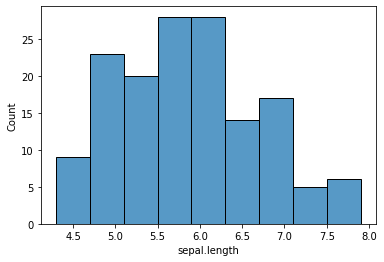

In [28]:
sns.histplot(data=df["sepal.length"])

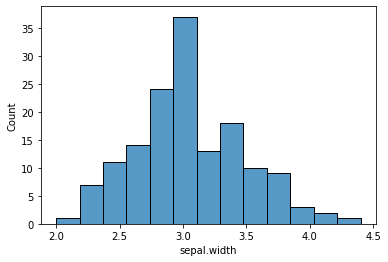

In [27]:
sns.histplot(data=df["sepal.width"])

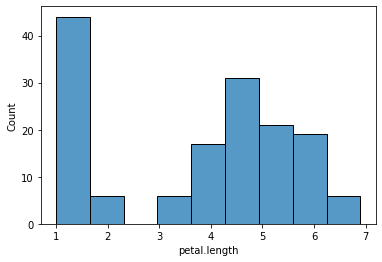

In [29]:
sns.histplot(data=df["petal.length"])


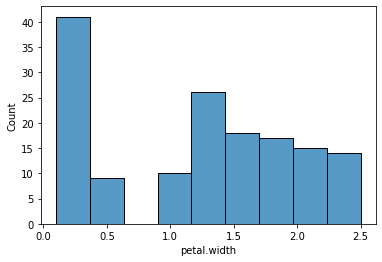

In [30]:
sns.histplot(data=df["petal.width"])


Boxplot

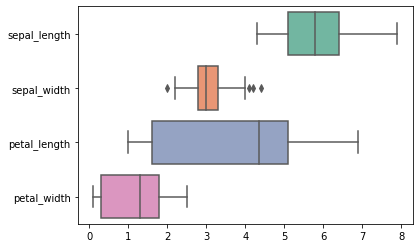

In [33]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")


Bài 3: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
- Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
- Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm
thử. Code tương ứng.

- 4 cột đầu tiên sẽ là feature, cột cuối là label
- Ta sẽ lấy 70% dữ liệu để train, 30% còn lại dùng để test
+ lúc này ta có được x_train, y_train, x_test, y_test

In [34]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(
 df[['sepal.length','sepal.width','petal.length','petal.width']], df['variety'], test_size=0.33, random_state=42)
 print(X_train)
 print(y_train)
 print(X_test)
 print(y_test)

     sepal.length  sepal.width  petal.length  petal.width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]
96     Versicolor
105     Virginica
66     Versicolor
0          Setosa
122     Virginica
          ...    
71     Versicolor
106     Virginica
14         Setosa
92     Versicolor
102     Virginica
Name: variety, Length: 100, dtype: object
     sepal.length  sepal.width  petal.le



Bài 4: Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa


Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm.
Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra.
Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. 
Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.


Kỹ thuật này thường bao gồm các bước như sau:
- Xáo trộn dataset một cách ngẫu nhiên
- Chia dataset thành k nhóm
- Với mỗi nhóm:
+ Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
+ Các nhóm còn lại được sử dụng để huấn luyện mô hình
+ Huấn luyện mô hình
+ Đánh giá và sau đó hủy mô hình
- Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

In [15]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
import numpy as np

In [6]:
def load_data():

  # Load dữ liệu CIFAR đã được tích hợp sẵn trong Keras
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()

  # Chuẩn hoá dữ liệu
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_test = X_test / 255
  X_train = X_train / 255

  # Do CIFAR đã chia sẵn train và test nên ta nối lại để chia K-Fold
  X = np.concatenate((X_train, X_test), axis=0)
  y = np.concatenate((y_train, y_test), axis=0)

  return X, y

In [7]:
# Sau khi xong bước này ta sẽ có dữ liệu X và y, ta tiến hành xây dựng kiến trúc model và sau đó là chia Fold mà cụ thể ở đây là 10 Folds.
def get_model():

  model = Sequential()
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile  model
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

  return model

In [43]:
# Định nghĩa K-Fold CV

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_idx = 1

for train_ids, val_ids in kfold.split(X, y):

  model = get_model()

  print("Bắt đầu train Fold ", fold_idx)

  # Train model
  model.fit(X[train_ids], y[train_ids],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

  # Test và in kết quả
  scores = model.evaluate(X[val_ids], y[val_ids], verbose=0)
  print("Đã train xong Fold ", fold_idx)

  # Thêm thông tin accuracy và loss vào list
  accuracy_list.append(scores[1] * 100)
  loss_list.append(scores[0])

  # Sang Fold tiếp theo
  fold_idx = fold_idx + 1

NameError: ignored

In [ ]:
# In kết quả tổng thể
print('* Chi tiết các fold')
for i in range(0, len(accuracy_list)):
  print(f'> Fold {i+1} - Loss: {loss_list[i]} - Accuracy: {accuracy_list[i]}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')
print(f'> Loss: {np.mean(loss_list)}')

Bài 5: Hãy trình bày lý thuyết về các chủ điểm sau:
- Bias là gì?
- Overfitting là gì?
- RMSE là gì?
- Precision là gì?

- Bias: nghĩa là độ lệch, biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu.
- Overfitting là hiện tượng quy mô tìm đc quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, and chất lượng quy mô đã không còn gì cực tốt trên dữ liệu test nữa. Dữ liệu test đc giả sử là không đc biết trước, and không đc cần sử dụng để thành lập những quy mô Machine Learning.
- Lỗi trung bình bình phương (RMSE) là độ lệch chuẩn của phần dư ( lỗi dự đoán ). Phần dư là thước đo khoảng cách từ các điểm dữ liệu đường hồi quy;
- Precision (độ chính xác) hay Positive predictive value (PPV):
Là tỉ lệ thực sự positive trên tổng số các trường hợp được mô hình dán nhãn “Positive”. Precision là một thuật ngữ bên Data science và trong y học nó tương đương với khái niệm « PPV ». Nó đo lường tính “xác định”, hay khả năng phân loại Positive chính xác của mô hình. Nhi thích dùng Precision hơn PPV, vì thuật ngữ “value” tuy chuyên biệt cho Positive, nhưng không nói lên ý nghĩa “khả năng” (performance), còn Positive hay Negative chỉ là tên gọi quy ước

In [ ]:
Bài 6: Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test
dataset) và code tương ứng